<a href="https://colab.research.google.com/github/earth516/coding_colab/blob/main/%EC%99%B8%EA%B3%84%ED%96%89%EC%84%B1_%EA%B3%B5%EC%A0%84%EA%B6%A4%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-20-5b9bcad52db2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
<ipython-input-20-5b9bcad52db2>:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line_star.set_data(x_star[frame], y_star[frame])
<ipython-input-20-5b9bcad52db2>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line_planet.set_data(x_planet[frame], y_planet[frame])


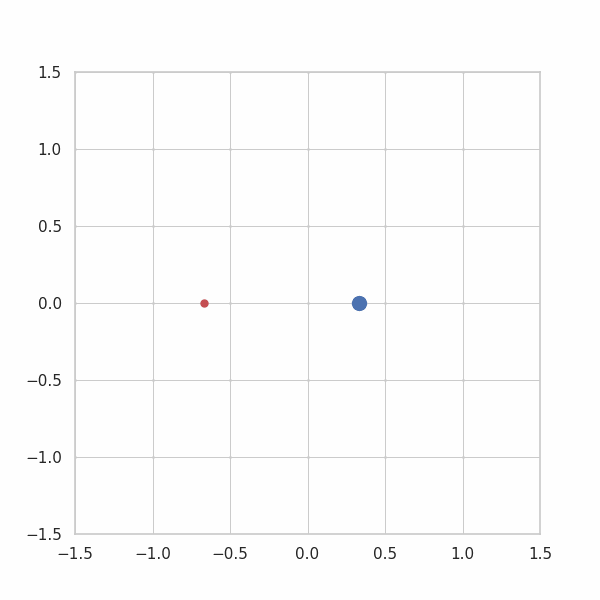

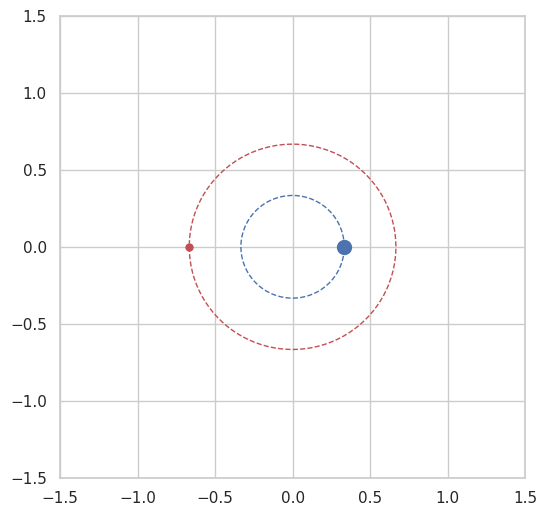

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 시각화 스타일 설정
plt.style.use('seaborn-pastel')

# 질량 (임의의 단위)
mass_star = 1.0
mass_planet = 0.5

# 거리 (임의의 단위)
distance = 1.0

# 공통질량 중심 계산
center_of_mass = (mass_planet * distance) / (mass_star + mass_planet)

# 공전 궤도 반경
r_star = center_of_mass
r_planet = distance - center_of_mass

# 시간 설정
period = 2 * np.pi
time = np.linspace(0, period, 200)

# 중심별과 외계행성의 위치 계산 (원운동)
theta = time
x_star = r_star * np.cos(theta)
y_star = r_star * np.sin(theta)
x_planet = -r_planet * np.cos(theta)
y_planet = -r_planet * np.sin(theta)

# 애니메이션 생성
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.5 * distance, 1.5 * distance)
ax.set_ylim(-1.5 * distance, 1.5 * distance)

line_star, = ax.plot([], [], 'bo', markersize=10, label='Star')
line_planet, = ax.plot([], [], 'ro', markersize=5, label='Planet')
line_orbit_star, = ax.plot([], [], 'b--', lw=1)
line_orbit_planet, = ax.plot([], [], 'r--', lw=1)

def init():
    line_star.set_data([], [])
    line_planet.set_data([], [])
    line_orbit_star.set_data([], [])
    line_orbit_planet.set_data([], [])
    return line_star, line_planet, line_orbit_star, line_orbit_planet

def update(frame):
    line_star.set_data(x_star[frame], y_star[frame])
    line_planet.set_data(x_planet[frame], y_planet[frame])
    line_orbit_star.set_data(x_star[:frame], y_star[:frame])
    line_orbit_planet.set_data(x_planet[:frame], y_planet[:frame])
    return line_star, line_planet, line_orbit_star, line_orbit_planet

# 애니메이션을 GIF로 저장
ani = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)
gif_writer = PillowWriter(fps=30)
ani.save("/content/orbit_simulation.gif", writer=gif_writer)

# 저장된 GIF 출력
from IPython.display import Image
Image(filename="/content/orbit_simulation.gif")